In [24]:
import sys
sys.path.append('../')

In [25]:
import os
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [26]:
image_folder = '../data/Image/LIDC-IDRI-0001/'
mask_folder = '../data/Mask/LIDC-IDRI-0001/'

image_file = image_folder.split('/')[-2][-4:] + '_NI001.npy'
mask_file = image_folder.split('/')[-2][-4:] + '_MA001.npy'

image_folder = '../data/Clean/Image/LIDC-IDRI-0028/'
mask_folder = '../data/Clean/Mask/LIDC-IDRI-0028/'

image_file = image_folder.split('/')[-2][-4:] + '_CN001.npy'
mask_file = image_folder.split('/')[-2][-4:] + '_CM001.npy'


In [27]:
img = np.load(os.path.join(image_folder, image_file))
mask = np.load(os.path.join(mask_folder, mask_file))

In [28]:
mask.shape

(128, 128, 128)

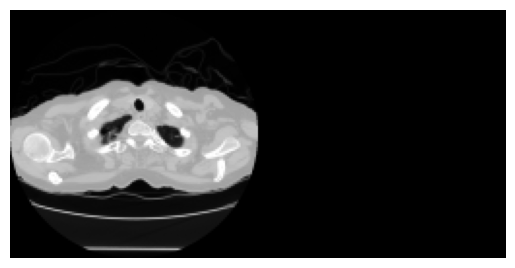

In [29]:
length = mask.shape[0]
images = []
masks = []
for i in range(length):
    # normalize to -1 to 1
    data = img[i]
    data = (data - data.min()) / (data.max() - data.min())
    data = data * 2 - 1
    images.append(data)
    masks.append(mask[i])
    
fig = plt.figure()
plt.axis("off")
ims = [[plt.imshow(np.concatenate((img, np.where(mask > 0, 1, -1)), axis=1), cmap='gray')] for img, mask in zip(images, masks)]
ani = animation.ArtistAnimation(fig, ims, interval=250, repeat_delay=1000, blit=True)

ani.save("../outputs/image.gif", writer='pillow')